<h1>We will talk about the mathematical intuition for Support Vector Machines

<h3> Prerequisites

* **Vectors**
  
  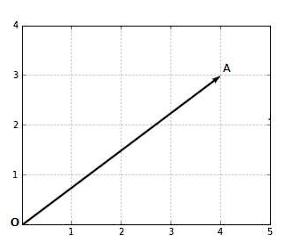
  
  can call it a=(4,3)
  
  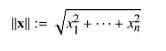
  
  mangnitude of vector
  
  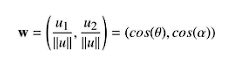

  direction of vector

* **Dot-Product**

  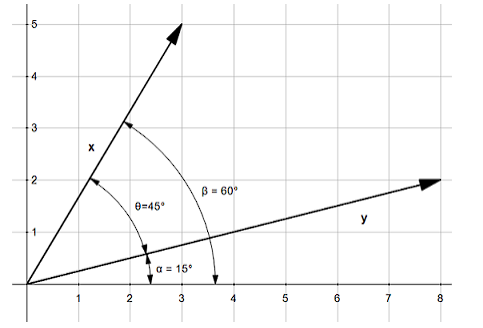
  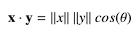

* **Hyperplane**

    a subspace one dimension less than the ambient space

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
data = load_breast_cancer()

# Extract features and target
X = data.data
y = data.target

# Check the target classes
print("Target classes:", np.unique(y))

Target classes: [0 1]


In [3]:
# Convert to binary labels: 1 for donated, -1 for not donated
y = y.astype(int)
y[y == 0] = -1

In [4]:
np.unique(y)

array([-1,  1])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=500)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
m,n = X_train.shape

In [8]:
w = np.zeros((n,))
b = 0

In [9]:
def hinge_loss(x,y,w,b):
    loss = max(0,1-y*(np.dot(w,x)+b))
    return loss

In [10]:
def compute_total_loss(X,y,w,b,loss_fn=hinge_loss):
    m,n = X.shape
    loss=0
    reg=0
    for i in range(m):
        loss+=loss_fn(X[i],y[i],w,b)
    reg+=np.sum(w**2)
    
    return (loss / m) + (reg / 2)


In [11]:
def compute_subgradient(X, y, w, b, C):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        condition = y[i] * (np.dot(w, X[i]) + b)
        if condition < 1:
            dj_dw += -C * y[i] * X[i]
            dj_db += -C * y[i]

    
    dj_dw += w

    return dj_dw / m, dj_db / m


In [12]:
def gradient_descent_with_eval(X_train, y_train, X_test, y_test,
                                w, b, C, alpha, n_iters, loss_fn, tol=1e-4):
    train_loss_history = []
    test_loss_history = []

    for i in range(n_iters):
        dj_dw, dj_db = compute_subgradient(X_train, y_train, w, b, C)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Calculate loss on train and test
        train_loss = compute_total_loss(X_train, y_train, w, b, loss_fn)
        test_loss = compute_total_loss(X_test, y_test, w, b, loss_fn)

        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)

        if test_loss < tol:
            print(f"Stopped early at iteration {i} — test loss: {test_loss:.6f}")
            break

        if i % max(1, n_iters // 10) == 0:
            print(f"Iteration {i:4d}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")

    return w, b, train_loss_history, test_loss_history

In [13]:
def predict(X,w,b):
    m,n = X.shape
    y = np.zeros((m,))
    for i in range(m):
        # print(np.dot(X_test, w) + b)
        y[i] = np.sign(np.dot(w,X[i])+b)
    return y

In [14]:

def plot_loss(train_loss, test_loss):
    plt.figure(figsize=(8,5))
    plt.plot(train_loss, label="Train Loss")
    plt.plot(test_loss, label="Test Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss Curve (Train vs Test)")
    plt.legend()
    plt.grid(True)
    plt.show()


In [15]:
print(f"X.shape: {X.shape}, y.shape: {y.shape}")


X.shape: (569, 30), y.shape: (569,)


In [16]:
w,b,train_loss_history,test_losshistory = gradient_descent_with_eval(X_train,y_train,X_test,y_test,w,b,0.05,0.001,10000,hinge_loss,1e-5)

Iteration    0: Train Loss = 0.9996, Test Loss = 0.9996
Iteration 1000: Train Loss = 0.6218, Test Loss = 0.6705
Iteration 2000: Train Loss = 0.4155, Test Loss = 0.4779
Iteration 3000: Train Loss = 0.3451, Test Loss = 0.4029
Iteration 4000: Train Loss = 0.3165, Test Loss = 0.3634
Iteration 5000: Train Loss = 0.3022, Test Loss = 0.3449
Iteration 6000: Train Loss = 0.2955, Test Loss = 0.3341
Iteration 7000: Train Loss = 0.2925, Test Loss = 0.3262
Iteration 8000: Train Loss = 0.2914, Test Loss = 0.3212
Iteration 9000: Train Loss = 0.2915, Test Loss = 0.3179


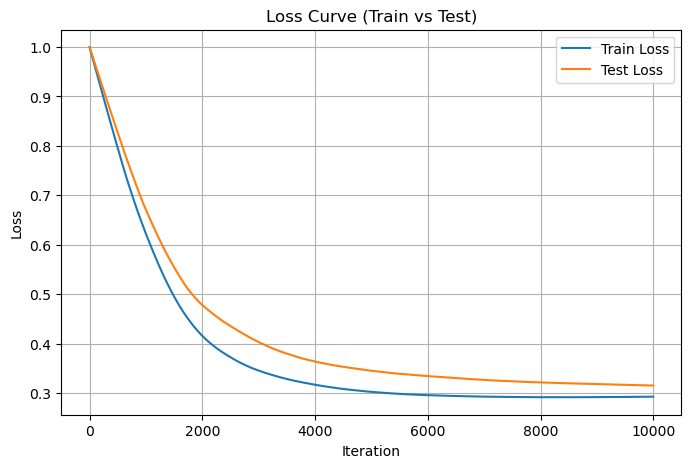

In [17]:
plot_loss(train_loss_history,test_losshistory)

In [18]:
pred = predict(X_test,w,b)

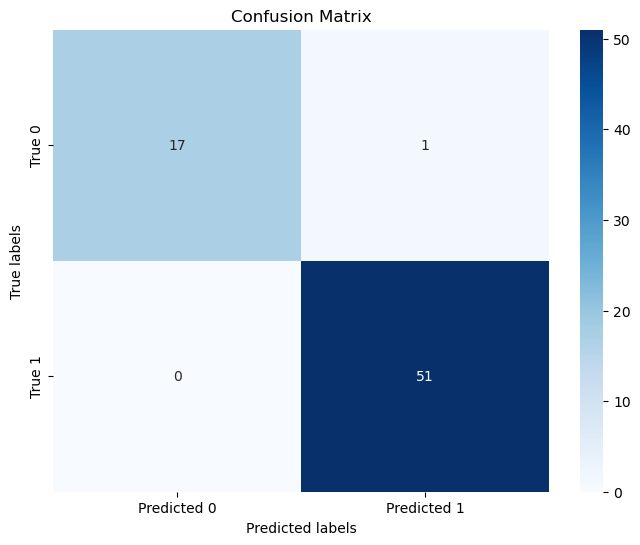

In [19]:
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion Matrix')
plt.show()